In [4]:

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np




In [5]:
df=pd.read_csv("CC_GENERAL.csv", sep=",")

df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

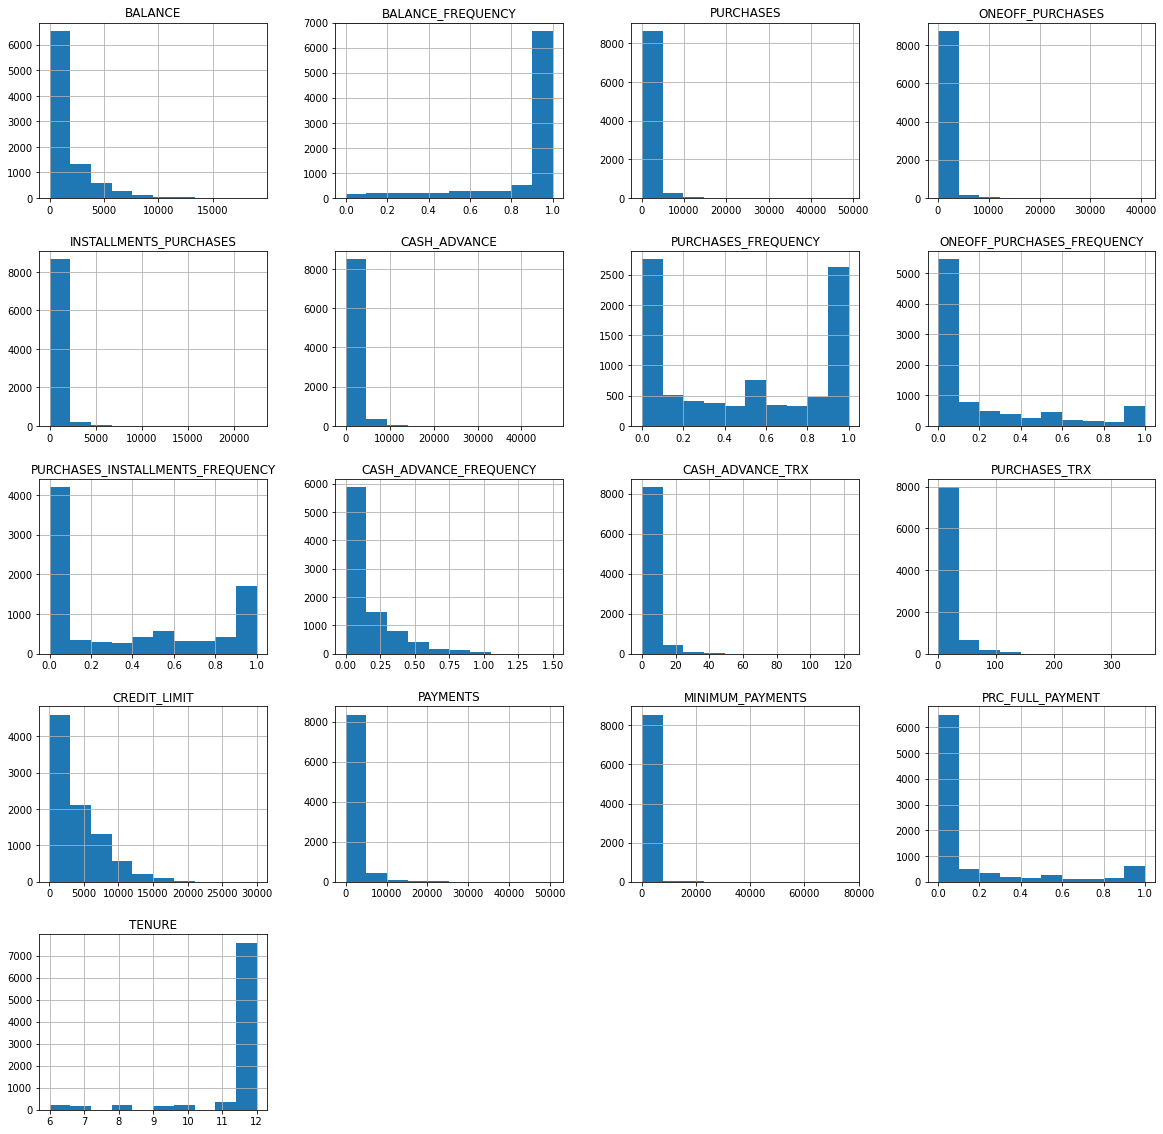

In [7]:
df.hist(figsize=(20,20))
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
#remplacer les valeurs manquantes
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean() , inplace=True)
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean() , inplace=True)

In [26]:
df.drop("CUST_ID",axis= 1 , inplace=True)

<AxesSubplot:>

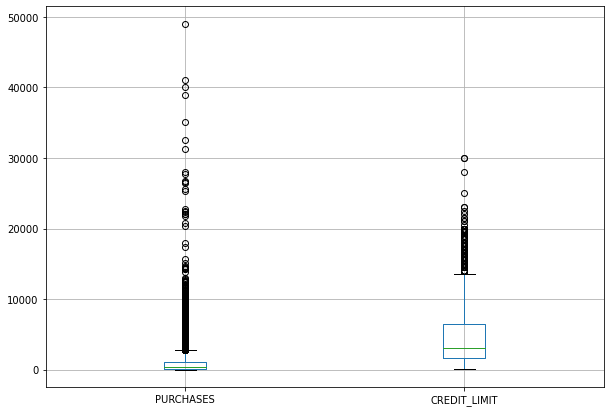

In [48]:
df_ = df[["PURCHASES", "CREDIT_LIMIT"]]
df_.boxplot(figsize=(10,7))


In [13]:
def remove_outliers(df):
    variables = ["PURCHASES", "CREDIT_LIMIT"]
    
    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]
        
    return df

In [14]:
remove_outliers(df_)

PURCHASES  CREDIT_LIMIT
0         95.40        1000.0
1          0.00        7000.0
2        773.17        7500.0
3       1499.00        7500.0
4         16.00        1200.0
...         ...           ...
8945     291.12        1000.0
8946     300.00        1000.0
8947     144.40        1000.0
8948       0.00         500.0
8949    1093.25        1200.0

[8665 rows x 2 columns]

In [15]:
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

In [16]:
clust_labels=model.fit_predict(df_)

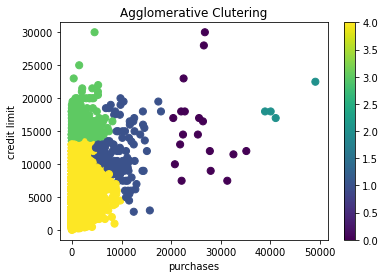

In [17]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df_['PURCHASES'] ,df_ ["CREDIT_LIMIT"] , c= clust_labels, s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("purchases")
ax.set_ylabel("credit limit")
plt.colorbar(scatter)

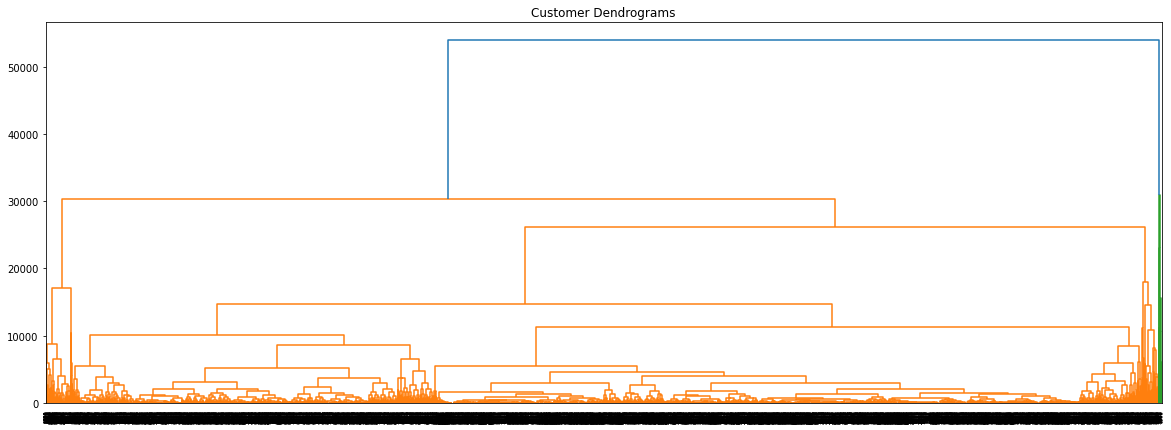

In [18]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(df_, method="complete"))


### K-means : 

In [41]:
from sklearn.cluster import KMeans
ssd =[]
for k in range(1,20) :
    km=KMeans(n_clusters = k)
    km=km.fit(df_)
    ssd.append(km.inertia_)


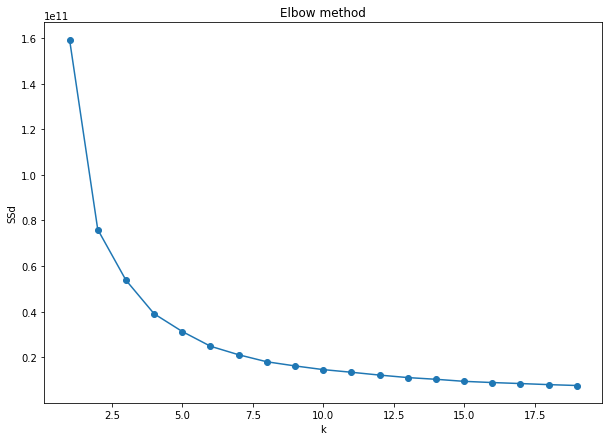

In [42]:
plt.figure(figsize=(10,7))
plt.plot(range(1,20),ssd,'o-')
plt.title("Elbow method")
plt.xlabel("k")
plt.ylabel("SSd")
plt.show()


In [45]:
km = KMeans(n_clusters=5)
km = km.fit(df_)
predicted_classes= km.predict(df_)


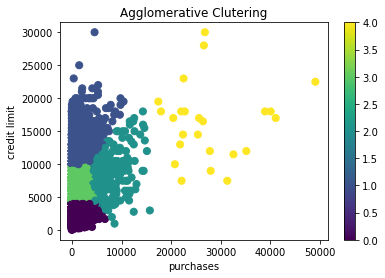

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_['PURCHASES'], df_[
                     "CREDIT_LIMIT"], c=predicted_classes, s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("purchases")
ax.set_ylabel("credit limit")
plt.colorbar(scatter)


In [49]:
#the classification is different in each method 